In [1]:
import torch
import torch.nn as nn
import pandas as pd
from chessEngine import ChessEncoder, MLPEngine
import matplotlib.pyplot as plt

# Preprocessing

In [2]:
df = pd.read_csv('fen_analysis.csv')
# df

In [3]:
encoder_object = ChessEncoder()

In [4]:
fen_encodings = []
for fen_i in df['fen_value']:
    encoded_fen = encoder_object.encode_fen(fen_i)
    fen_encodings.append(encoded_fen)

In [5]:
X = torch.tensor(fen_encodings, dtype=torch.int32)

In [6]:
score_encodings = []
for y_i in df['score']:
    # print(y_i)
    encoded_score = encoder_object.encode_score(str(y_i))
    score_encodings.append(encoded_score)
y = torch.tensor(score_encodings)

In [7]:
X.shape, y.shape

(torch.Size([336903, 70]), torch.Size([336903]))

# Helper Functions

In [8]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [9]:
def get_batch(X, Y, bs):
    if bs > len(X): bs = len(X)
    assert isinstance(X, torch.Tensor)
    assert isinstance(Y, torch.Tensor)

    batch = torch.randint(0, len(X), (bs,))
    x = X[batch].to(device)
    y = Y[batch].to(device)
    return x, y
# b = get_batch(X, y, 64)

# Training

In [10]:
# hyperparameters
lr = 0.01
num_steps = 100
bs = 12800
# allowed_error = 100 #

In [11]:
model = MLPEngine(embedding_dim=32).to(device)
loss_category = nn.MSELoss()
optimiser = torch.optim.Adam(model.parameters(), lr = lr)
# model.compile()

In [12]:
history = []
for epoch in range(num_steps):
    optimiser.zero_grad()
    x_batch, y_batch = get_batch(X, y, bs) 
    # print(x_batch, y_batch)
    y_pred = model(x_batch).view(bs)
    # print(y_pred.shape, y_batch.shape)
    loss = loss_category(y_pred, y_batch)
    # print(loss.item())
    if loss.item() < 100:history.append(loss.item())
    loss.backward()
    optimiser.step()



In [ ]:
model.parameters

<bound method Module.parameters of MLPEngine(
  (embd1): Embedding(70, 32)
  (l1): Linear(in_features=2240, out_features=1024, bias=True)
  (l2): Linear(in_features=1024, out_features=128, bias=True)
  (l3): Linear(in_features=128, out_features=1, bias=True)
  (dropout1): Dropout(p=0, inplace=False)
)>

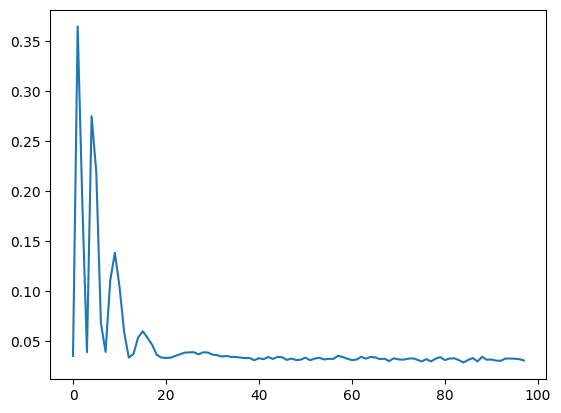

In [14]:
plt.plot(history)

In [15]:
history

[0.0348527617752552,
 0.3648081123828888,
 0.18886514008045197,
 0.03857940807938576,
 0.27497726678848267,
 0.2191520482301712,
 0.06783811748027802,
 0.039006639271974564,
 0.11024819314479828,
 0.1380499303340912,
 0.10436730831861496,
 0.058802079409360886,
 0.033191122114658356,
 0.0368342399597168,
 0.053267497569322586,
 0.059629976749420166,
 0.05323890224099159,
 0.046221550554037094,
 0.03614727407693863,
 0.033276695758104324,
 0.03284312039613724,
 0.03314598277211189,
 0.034891366958618164,
 0.0365392304956913,
 0.03820044547319412,
 0.03844001516699791,
 0.03860320895910263,
 0.0364653579890728,
 0.03856164962053299,
 0.03829405456781387,
 0.03622498735785484,
 0.03563036024570465,
 0.034294698387384415,
 0.03488491475582123,
 0.03395600616931915,
 0.03385399281978607,
 0.033242929726839066,
 0.03277391940355301,
 0.03280070424079895,
 0.030594047158956528,
 0.03260047733783722,
 0.03161412850022316,
 0.03382392227649689,
 0.03190455958247185,
 0.033939555287361145,
 0.03